In [186]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [187]:
df = pd.read_csv("s1_modified_labelled.csv")

In [269]:
d = pd.read_csv("s1_modified_labelled.csv")

In [188]:
df.head()

,x,y,Class
0,844536,424646,0
1,870801,476330,0
2,878184,487392,0
3,846693,429031,0
4,777811,751059,0


In [189]:
from sklearn import preprocessing

In [190]:
sca = preprocessing.StandardScaler()

In [191]:
df = sca.fit_transform(df)

In [192]:
df = pd.DataFrame(df)

In [193]:
df.head()

,0,1,2
0,1.202131,-0.512126,-1.46385
1,1.316022,-0.231879,-1.46385
2,1.348037,-0.171897,-1.46385
3,1.211484,-0.488349,-1.46385
4,0.912795,1.257791,-1.46385


In [194]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [195]:
df.columns = ["x", "y", "class"]

In [196]:
df

,x,y,class
0,1.202131,-0.512126,-1.46385
1,1.316022,-0.231879,-1.46385
2,1.348037,-0.171897,-1.46385
3,1.211484,-0.488349,-1.46385
4,0.912795,1.257791,-1.46385
...,...,...,...
475,-0.224163,0.116847,1.46385
476,0.170157,0.299758,1.46385
477,0.113535,0.564010,1.46385
478,0.172482,0.414299,1.46385


In [197]:
from sklearn.cluster import DBSCAN

In [198]:
df = df.iloc[:, 0:2]

In [199]:
df

,x,y
0,1.202131,-0.512126
1,1.316022,-0.231879
2,1.348037,-0.171897
3,1.211484,-0.488349
4,0.912795,1.257791
...,...,...
475,-0.224163,0.116847
476,0.170157,0.299758
477,0.113535,0.564010
478,0.172482,0.414299


DBSCAN


In [276]:
dbs = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean').fit(df)

In [277]:
dbs

DBSCAN(eps=0.2)

In [278]:
dbs.labels_

array([ 4, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

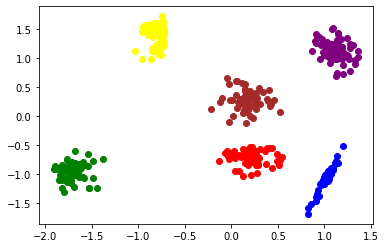

In [279]:
import matplotlib.pyplot as plt
X0 = df[db.labels_ == 0]
plt.scatter(X0.iloc[:, 0], X0.iloc[:, 1], c = 'purple')
X1 = df[db.labels_ == 1]
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c = 'green')
X2 = df[db.labels_ == 2]
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c = 'red')
X3 = df[db.labels_ == 3]
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c = 'yellow')
X4 = df[db.labels_ == 4]
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c = 'blue')
X5 = df[db.labels_ == 5]
plt.scatter(X5.iloc[:, 0], X5.iloc[:, 1], c = 'brown')

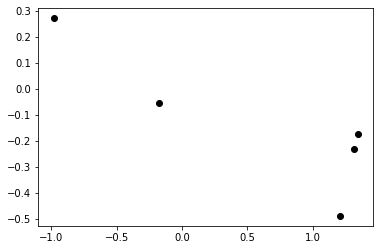

In [280]:
X6 = df[db.labels_ == -1]
plt.scatter(X6.iloc[:, 0], X6.iloc[:, 1], c = 'black')

Agglomerative using ward, S-Link and C-Link


In [205]:
plt.figure(figsize = (8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

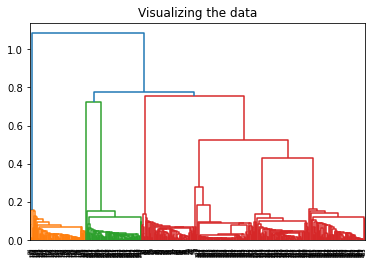

In [206]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(df, method = "single"))

In [207]:

single = AgglomerativeClustering(n_clusters = 6, linkage = "single")

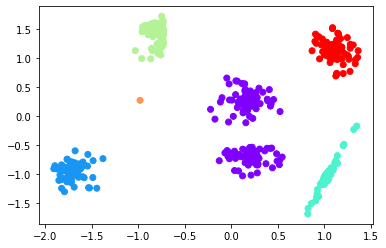

In [208]:
plt.scatter(df["x"], df["y"], c = single.fit_predict(df), cmap = "rainbow")

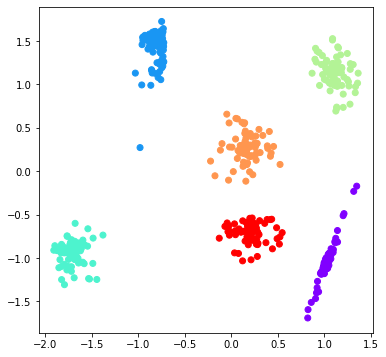

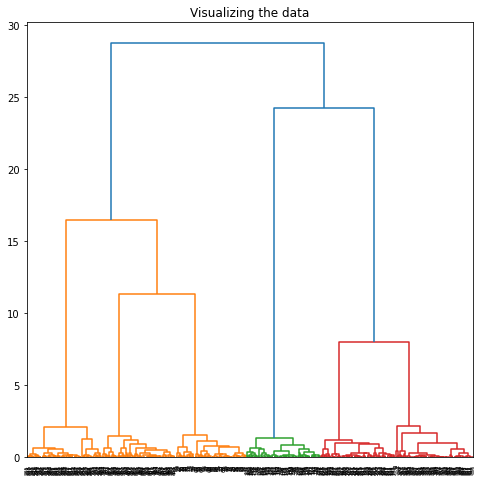

In [209]:
ward = AgglomerativeClustering(n_clusters = 6, linkage = "ward")
plt.figure(figsize = (6, 6))
plt.scatter(df["x"], df["y"], c = ward.fit_predict(df), cmap = "rainbow")

plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(df, method = "ward"))

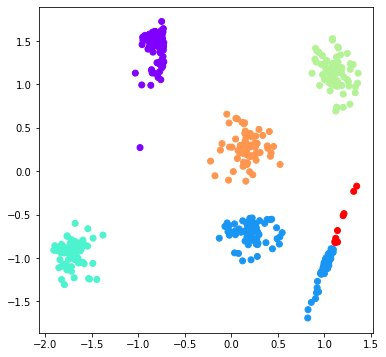

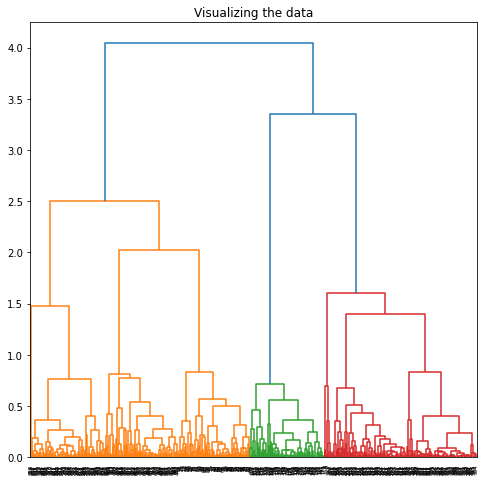

In [210]:
complete = AgglomerativeClustering(n_clusters = 6, linkage = "complete")
plt.figure(figsize = (6, 6))
plt.scatter(df["x"], df["y"], c = complete.fit_predict(df), cmap = "rainbow")

plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
dendrogram = shc.dendrogram(shc.linkage(df, method = "complete"))

In [211]:
from sklearn.cluster import KMeans

In [212]:
kmeans = KMeans(init = "random", n_clusters = 6, random_state = 42, n_init = 10, max_iter = 300)
kmeans.fit(df)
y_kmeans = kmeans.fit_predict(df)

In [213]:
y_kmeans

array([4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [214]:
X0 = df[y_kmeans == 0]
X1 = df[y_kmeans == 1]
X2 = df[y_kmeans == 2]
X3 = df[y_kmeans == 3]
X4 = df[y_kmeans == 4]
X5 = df[y_kmeans == 5]

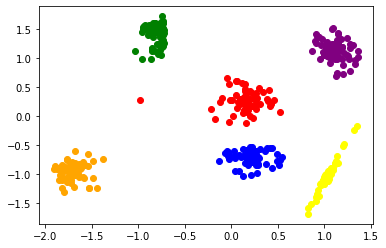

In [215]:
plt.scatter(X0.iloc[:, 0], X0.iloc[:, 1], c = 'purple')
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c = 'red')
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c = 'blue')
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c = 'green')
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c = 'yellow')
plt.scatter(X5.iloc[:, 0], X5.iloc[:, 1], c = 'orange')

In [281]:
dbscan = metrics.silhouette_samples(df, dbs.labels_, metric = 'euclidean')

In [282]:
dbscan
dbscan.mean()

0.7958342815672201

In [218]:
w = metrics.silhouette_samples(df, ward.labels_, metric = 'euclidean')
w

array([ 0.42044223,  0.27241173,  0.25069477,  0.40505124,  0.76910782,
        0.86359579,  0.7708871 ,  0.86308196,  0.82709282,  0.7811789 ,
        0.78785078,  0.81313221,  0.82358368,  0.62628528,  0.84240369,
        0.86801374,  0.86764707,  0.8495291 ,  0.74317583,  0.82966309,
        0.84210303,  0.80821287,  0.86208097,  0.81419408,  0.84939717,
        0.73424393,  0.82479192,  0.7864478 ,  0.74076693,  0.81812331,
        0.59852911,  0.86450867,  0.72281648,  0.84658455,  0.84139596,
        0.83292765,  0.8143303 ,  0.61427923,  0.75931035,  0.77691436,
        0.72720927,  0.86850484,  0.85789373,  0.861373  ,  0.8600781 ,
        0.82927413,  0.86614254,  0.80164454,  0.86871352,  0.86649065,
        0.73351849,  0.81329116,  0.75581649,  0.80985281,  0.65933657,
        0.85107392,  0.75414595,  0.81479039,  0.80654035,  0.79641801,
        0.79622143,  0.86559253,  0.86362959,  0.8610493 ,  0.86208419,
        0.73805922,  0.82553949,  0.84531417,  0.86435646,  0.75

In [219]:
c = metrics.silhouette_samples(df, complete.labels_, metric = 'euclidean')
c

array([ 0.68349079,  0.58617137,  0.55616932,  0.67957655,  0.76910782,
        0.86359579,  0.7708871 ,  0.86308196,  0.82709282,  0.7811789 ,
        0.78785078,  0.81313221,  0.82358368,  0.62628528,  0.84240369,
        0.86801374,  0.86764707,  0.8495291 ,  0.74317583,  0.82966309,
        0.84210303,  0.80821287,  0.86208097,  0.81419408,  0.84939717,
        0.73424393,  0.82479192,  0.7864478 ,  0.74076693,  0.81812331,
        0.59852911,  0.86450867,  0.72281648,  0.84658455,  0.84139596,
        0.83292765,  0.8143303 ,  0.61427923,  0.75931035,  0.77691436,
        0.72720927,  0.86850484,  0.85789373,  0.861373  ,  0.8600781 ,
        0.82927413,  0.86614254,  0.80164454,  0.86871352,  0.86649065,
        0.73351849,  0.81329116,  0.75581649,  0.80985281,  0.65933657,
        0.85107392,  0.75414595,  0.81479039,  0.80654035,  0.79641801,
        0.79622143,  0.86559253,  0.86362959,  0.8610493 ,  0.86208419,
        0.73805922,  0.82553949,  0.84531417,  0.86435646,  0.75

In [220]:
s = metrics.silhouette_samples(df, single.labels_, metric = 'euclidean')
s

array([ 0.49245985,  0.28845861,  0.2531194 ,  0.4735332 ,  0.82745239,
        0.89481206,  0.81489228,  0.89351041,  0.86828761,  0.82711243,
        0.83818524,  0.85860603,  0.86497522,  0.70459362,  0.88056981,
        0.89805935,  0.89790669,  0.88544728,  0.79928902,  0.86498443,
        0.88016909,  0.85546115,  0.89421813,  0.85472107,  0.88217233,
        0.80510344,  0.86533319,  0.83121084,  0.78798945,  0.85547482,
        0.68890681,  0.89396341,  0.77838798,  0.88198194,  0.87724018,
        0.86649543,  0.85883374,  0.701445  ,  0.81430948,  0.81908474,
        0.80130734,  0.89824014,  0.89100685,  0.8911211 ,  0.89005789,
        0.86637064,  0.89679319,  0.84141747,  0.89803291,  0.89578866,
        0.78038709,  0.85679098,  0.815486  ,  0.85312597,  0.7261228 ,
        0.88506717,  0.81607407,  0.86070503,  0.8552835 ,  0.83485619,
        0.83784861,  0.89518816,  0.89309211,  0.89084417,  0.89194757,
        0.78806113,  0.860357  ,  0.88146341,  0.8957883 ,  0.80

In [221]:
y = metrics.silhouette_samples(df, kmeans.labels_, metric = 'euclidean')
y

array([0.42044223, 0.27241173, 0.25069477, 0.40505124, 0.77112036,
       0.86487202, 0.77302134, 0.86426386, 0.82858378, 0.78275074,
       0.78955466, 0.81507775, 0.82506117, 0.63059775, 0.84388216,
       0.86920387, 0.86885005, 0.85097567, 0.74515042, 0.83123715,
       0.84355268, 0.80991241, 0.86334026, 0.81604371, 0.85063989,
       0.73722197, 0.82657399, 0.78799455, 0.74252329, 0.81982201,
       0.60343843, 0.86568533, 0.72488289, 0.84808901, 0.84295143,
       0.83433357, 0.81626182, 0.61895358, 0.76118631, 0.77892144,
       0.72994483, 0.86968479, 0.85916565, 0.86256859, 0.86127663,
       0.83062438, 0.8673793 , 0.80312415, 0.86989315, 0.86768485,
       0.73529957, 0.81522358, 0.7585395 , 0.81180808, 0.66300436,
       0.85234604, 0.75622355, 0.81669349, 0.80852765, 0.79812267,
       0.79818157, 0.86680903, 0.86481716, 0.86224612, 0.86332024,
       0.7406002 , 0.82694215, 0.84683833, 0.86559761, 0.75281016,
       0.84849209, 0.8137531 , 0.86875908, 0.57002021, 0.85382

In [283]:
ss_dbscan = []
for label in range(6):
  ss_dbscan.append(dbscan[dbs.labels_ == label].mean())
print(ss_dbscan)

[0.8050677606630225, 0.8937793795196722, 0.7488966811577216, 0.8563449084652952, 0.8008063104909865, 0.7418909551964109]


In [223]:
ss_ward = []
for label in range(6):
  ss_ward.append(w[ward.labels_ == label].mean())
print(ss_ward)

[0.7596529748215892, 0.8379076219631338, 0.8937793795196722, 0.8059468874447834, 0.7339141800229522, 0.7507832858141817]


In [224]:
ss_complete = []
for label in range(6):
  ss_complete.append(c[complete.labels_ == label].mean())
print(ss_complete)

[0.8379076219631338, 0.20414774754431816, 0.9079156308566867, 0.8059468874447834, 0.7853842302684859, 0.6081693765522441]


In [225]:
ss_single = []
for label in range(6):
  ss_single.append(s[single.labels_ == label].mean())
print(ss_single)

[0.3801123444352735, 0.8551263292198901, 0.8186523773689968, 0.8047368088801956, 0.0, 0.8491257969131135]


In [226]:
ss_kmeans = []
for label in range(6):
  ss_kmeans.append(y[kmeans.labels_ == label].mean())
print(ss_kmeans)

[0.8077642913689619, 0.7133004522516861, 0.751324046409204, 0.855980764633404, 0.7596529748215892, 0.8937793795196722]


In [227]:
import statistics

In [228]:
statistics.mean(dbscan)

0.7958342815672201

In [229]:
statistics.mean(c)

0.6268020569816825

In [230]:
statistics.mean(s)

0.6793805200274224

In [231]:
statistics.mean(w)

0.7966116056591922

In [232]:
statistics.mean(y)

0.7962688065453963

In [233]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [234]:
import seaborn as sns

In [265]:
df_t = df.copy().transpose()

In [266]:

df_t = pd.DataFrame(df_t)

In [267]:
corr = df_t.corr(method = 'pearson')
print(corr)

     0    1    2    3    4    5    6    7    8    9    ...  470  471  472  \
0    1.0  1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0  ...  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0  ...  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0  ...  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0  ...  1.0  1.0  1.0   
4   -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
475 -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   
476 -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   
477 -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   
478 -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   
479 -1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0  1.0  ... -1.0 -1.0 -1.0   

     473  474  475  476  477  478  479  
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 

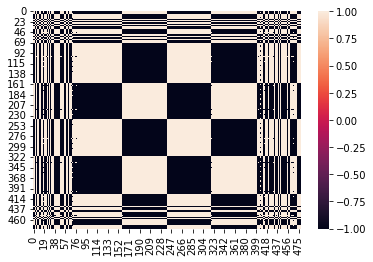

In [268]:
sns.heatmap(corr, vmax = 1)

In [272]:
r_ward = metrics.adjusted_rand_score(d['Class'], ward.labels_)
r_ward

0.9803009740372722

In [273]:
r_single = metrics.adjusted_rand_score(d['Class'], single.labels_)
r_single

0.8022147429363156

In [274]:
r_complete = metrics.adjusted_rand_score(d['Class'], complete.labels_)
r_complete

0.809931679984334

In [275]:
r_kmeans = metrics.adjusted_rand_score(d['Class'], kmeans.labels_)
r_kmeans

0.9752820336196293

In [284]:
r_db = metrics.adjusted_rand_score(d['Class'], dbs.labels_)
r_db

0.9824274646429886

In [291]:
mm = np.zeros((480, 480), dtype = int)
for i in range(480):
  temp = []
  for j in range(480):
    if dbs.labels_[i] == dbs.labels_[j]:
      mm[i][j] = 1

In [292]:
mm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

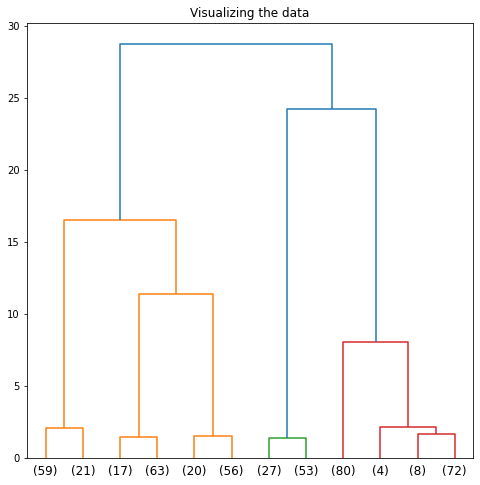

In [303]:
plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
Z = shc.linkage(df, method = "ward")
dendrogram = shc.dendrogram(Z, p = 12, truncate_mode = 'lastp', labels = df.index)

# def llf(id):
#   if id < 480:
#     return str(id)
#   else:
#     return '[%d %d %1.2f]' % (id, count, R[n-id,3])

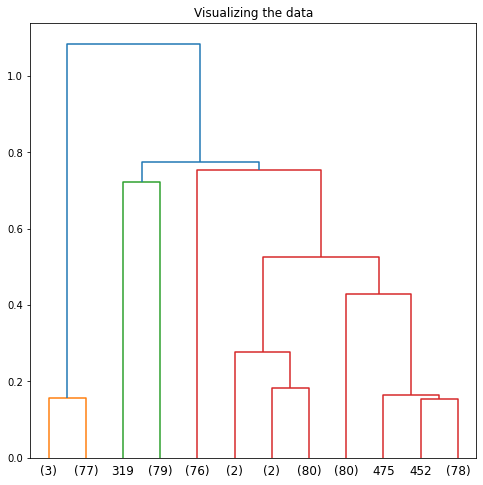

In [304]:
plt.figure(figsize = (8, 8))
plt.title("Visualizing the data")
Z = shc.linkage(df, method = "single")
dendrogram = shc.dendrogram(Z, p = 12, truncate_mode = 'lastp', labels = df.index)